***
# Project: Investigate a Dataset - [TMDb-Movies Database]
***

***
## Table of Contents
***
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#DC">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#RQ1">Which movies had the highest and lowest profit?</a></li>
<li><a href="#RQ2">Which movies had the most and least runtime?</a></li>
<li><a href="#RQ3">Which movies had the highest and lowest budget?</a></li>
<li><a href="#RQ4">Which movies had the highest and lowest revenue?</a></li>
<li><a href="#RQ5">What is the average runtime of all movies?</a></li>
<li><a href="#RQ6">Which are the most successful genres(over 15M dollars)?</a></li>
<li><a href="#RQ7">Which are the most frequent cast involved in high profit movies(over 15M dollars)?</a></li>
<li><a href="#RQ8">Which are the most frequent directors involved in high profit movies(over 15M dollars)?</a></li> 
<li><a href="#RQ9">What is the average budget, revenue and runtime of movies with over 15M Dollars profit?</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

***
<a id='intro'></a>
## Introduction
***
### Dataset Description 

***
> The dataset selected is TMDb movie data (cleaned from original data on Kaggle). 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
***

> In this dataset I'll be exploring the possible relationships and analysis to assist in providing insights and answer some questions.



### Questions for Analysis

***
1.  <a href="#RQ1">Which movies had the highest and lowest profit?</a>

2. <a href="#RQ2">Which movies had the most and least runtime?</a>

3. <a href="#RQ3">Which movies had the highest and lowest budget?</a>

4. <a href="#RQ4">Which movies had the highest and lowest revenue?</a>

5. <a href="#RQ5">What is the average runtime of all movies?</a>

6. <a href="#RQ6">Which are the most successful genres(over 15M dollars)?</a>

7. <a href="#RQ7">Which are the most frequent cast involved in high profit movies(over 15M dollars)?</a>

8. <a href="#RQ8">Which are the most frequent directors involved in high profit movies(over 15M dollars)?</a>

9. <a href="#RQ9">What is the average budget, revenue and runtime of movies with over 15M Dollars profit?</a>
***

In [3]:
# Importing all packages needed for analysis
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import seaborn as sns
import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!pip install tensorflow

In [5]:
!pip install --upgrade pandas

<a id='wrangling'></a>
## Data Wrangling

> I'll be loading the data to have an overview of the information provided, check for missing values, outliers, cleanliness, and then trim and clean that data according to the needs of the analysis/questions to be answered.

>- There are certain problematic columns, such as ‘cast’ and ‘genres’, that contain multiple values separated by pipe (|) characters that will need be cleaned
- All financial values are assumed and presented in dollar since we were given the input that the final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 **dollars** , accounting for inflation over time
- There are some columns that represent no value or add no insight that will be rid of later on


In [6]:
# loading the data for inspection
df = pd.read_csv('tmdb-movies.csv')
# Printing the first 5 rows of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# Display the overview info of the dataset and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
#Checking if all rows contain the intended data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [9]:
# Overall preview of the data measures 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
# Calculate number of duplicated rows
sum(df.duplicated())

1

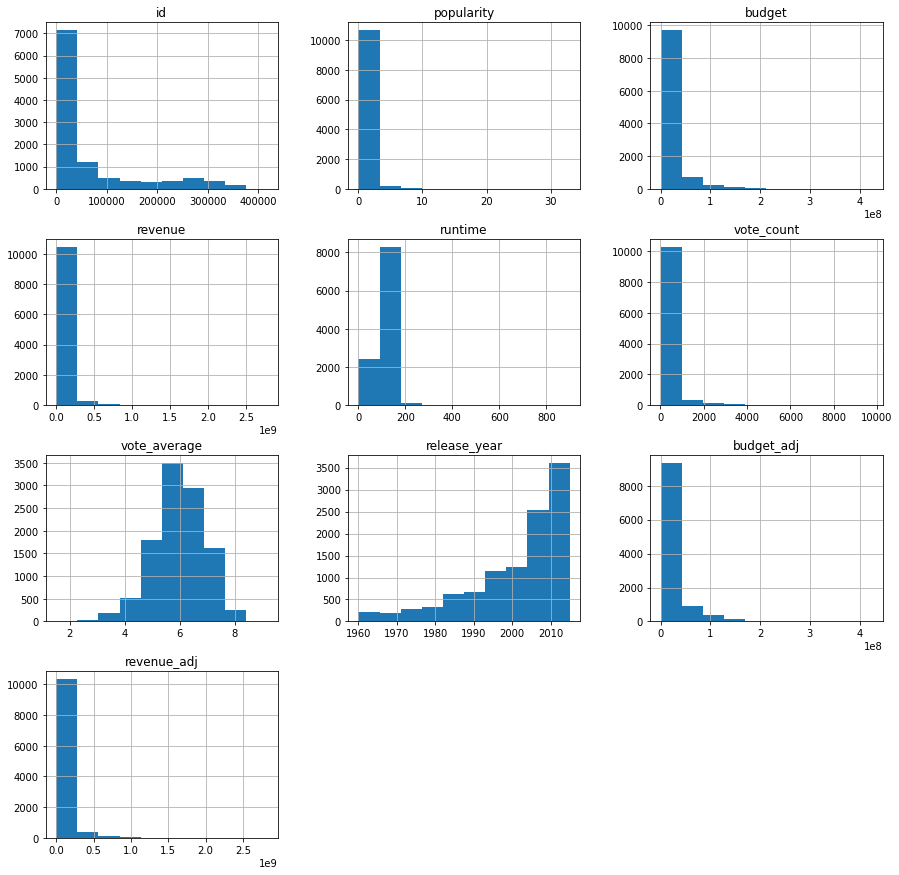

In [11]:
#basic/simple histograms to represent some of our data to assist in guidance going through the analysis
df.hist(figsize=(15,15));

<a id='DC'></a>
### Data Cleaning
> We'll start our cleaning process by applying the following actions.


1. Get rid of unnecessary columns such as  'id', 'imdb_id', , 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'tagline', 'overview', and 'production_companies'

2. Delete the one duplicated row present in the dataset

3. Dealing with '0" values present in the dataset columns and replacing them with NaN and then dropping them from the dataset altogether

4. Converting the 'release_date' into a date format

5. Converting the budget and revenue column into datatype

 

***
### <center><span style="color:DarkCyan;">1. Get rid of unnecessary columns such as  'id', 'imdb_id', , 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'tagline', 'overview', and 'production_companies</span></center>
***

In [12]:
# Deleting unnecessary columns
deleted_columns = [ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'tagline', 'overview', 'production_companies']
# Dropping the columns from the database
df.drop(deleted_columns, axis=1, inplace=True)
# Displaying the new cleaned dataset
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [13]:
# Store rows and columns using shape function
rows, col = df.shape
#printing the number of rows and colums however taking into consideration excluding the header
print('The dataset total rows are {} and {} columns.'.format(rows-1, col))

The dataset total rows are 10865 and 12 columns.


***
### <center><span style="color:DarkCyan;">2. Delete the one duplicated row present in the dataset</span></center>
***

In [14]:
#viewing the dubplicated values in the original_title column to validate
df['original_title'].value_counts().head()

Hamlet                  4
The Black Hole          3
Shelter                 3
The Three Musketeers    3
Julia                   3
Name: original_title, dtype: int64

In [27]:
#Validating the duplication of these value
title_limit = df['original_title'].value_counts().index.tolist()
title_limit = title_limit[:4]
title_limit

limit_id = df['original_title'].value_counts().index.tolist()

def valid_double_title(names):
    for limit in title_limit:
        df_title = df[df['original_title'] == limit]
        print(df_title.iloc[:,:5])
        print("*______________________________________________________*")
        
valid_double_title(title_limit)

       popularity   budget   revenue original_title  \
1890     0.086490        0         0         Hamlet   
8573     0.383469        0         0         Hamlet   
8797     0.277798  2000000   1568749         Hamlet   
10106    0.067973        0  20710451         Hamlet   

                                                    cast  
1890   David Tennant|Patrick Stewart|Penny Downie|Oli...  
8573   Kenneth Branagh|Derek Jacobi|Julie Christie|Ri...  
8797   Ethan Hawke|Kyle MacLachlan|Diane Venora|Sam S...  
10106  Mel Gibson|Glenn Close|Alan Bates|Paul Scofiel...  
*______________________________________________________*
      popularity    budget   revenue  original_title  \
3350    0.037628         0         0  The Black Hole   
6900    0.129400   3500000         0  The Black Hole   
7842    0.516927  20000000  35841901  The Black Hole   

                                                   cast  
3350                                      Napoleon Ryan  
6900  Kristy Swanson|Judd Nelso

> We can see that some titles are true duplicates and others just happen to share the same name due to different values in other attributes


In [15]:
# Dropping the duplicate row taking into consideration keeping the first one 
df.drop_duplicates(keep = 'first', inplace = True)
# Store rows and columns using shape function
rows, col = df.shape
print('The dataset total rows are {} and {} columns.'.format(rows-1, col))

The dataset total rows are 10864 and 12 columns.


***
### <center><span style="color:DarkCyan;">3. Dealing with '0" values present in the dataset columns and replacing them with NaN and then dropping them from the dataset altogether</span></center>
***

In [25]:
# Replacing runtime "0" with NaN
df['runtime'] = df['runtime'].replace(0, np.NaN)
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10834.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.363855,217.399632,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,30.948225,575.644627,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,112.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [26]:
# Inspecting problematic columns
columns = ['budget', 'revenue']
# Replacing "0" with NaN
df[columns] = df[columns].replace(0, np.NaN)
# Dropping NaN rows
df.dropna(subset = columns, inplace = True)
rows, col = df.shape
print('Now the dataset has {} rows.'.format(rows-1))

Now the dataset has 3853 rows.


 ***
### <center><span style="color:DarkCyan;">4. Converting the 'release_date' into a date format</span></center>
***

In [27]:
# Converting release_date column to DateTime
df.release_date = pd.to_datetime(df['release_date'])
# Display the new dataset
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


 ***
### <center><span style="color:DarkCyan;">5. Converting the budget and revenue column into datatype</span></center>
***

In [28]:
# Converting budget and revenue Columns into datatype
columns = ['budget', 'revenue']
df[columns] = df[columns].applymap(np.int64)
# Displaying the new datatype
df.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> Here I will be running operations, conclude statistics, visual representations to provide insights as well as answers to the questions asked in the "Questions for analysis" section. 


***
### <center><span style='background:LightSeaGreen'>We'll start by calculating a profit attribute from the data to be used in further analysis.</span></center>
***

In [29]:
# calculating profit by substracting the budget from the revenue
df['profit'] = df['revenue'] - df['budget']
# Display the new dataset
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1316249360


<a id='RQ1'></a>
### Research Question 1 (Which movies had the highest and lowest profit?)

In [30]:
# Movie with the highest profit
df.loc[df['profit'].idxmax()]

popularity                                                 9.432768
budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
runtime                                                       162.0
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
vote_count                                                     8458
vote_average                                                    7.1
release_year                                                   2009
profit                                                   2544505847
Name: 1386, dtype: object

***
#### <center><span style="color:DarkCyan;">Movie with the highest profit: *Avatar*</span></center>
***


In [31]:
# Movie with the lowest profit
df.loc[df['profit'].idxmin()]

popularity                                                  0.25054
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
runtime                                                       100.0
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
vote_count                                                       74
vote_average                                                    6.4
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object


***
#### <center><span style="color:DarkCyan;">Movie with the lowest profit: *The Warrior's Way*</span></center>
***


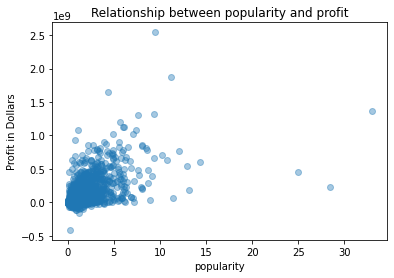

In [32]:
# Popularity and Profit correlation
# x-axis
plt.xlabel('popularity')
# y-axis
plt.ylabel('Profit in Dollars')
# Title of the histogram
plt.title('Relationship between popularity and profit')
plt.scatter(df['popularity'], df['profit'], alpha=0.4)
plt.show()

***
#### <center><span style="color:DarkCyan;">We can see a correlation exists between the higher profit a movie makes and higher popularity </span></center>
***

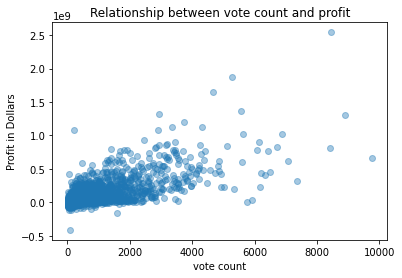

In [33]:
# Profit and vote_count correlation
# x-axis
plt.xlabel('vote count')
# y-axis
plt.ylabel('Profit in Dollars')
# Title of the histogram
plt.title('Relationship between vote count and profit')
plt.scatter(df['vote_count'], df['profit'], alpha=0.4)
plt.show()

***
#### <center><span style="color:DarkCyan;">We can see an increase in profit as vote counts increase, however the relationship is not strong enough to be considered an indicative KPI.</span></center>
***

<a id='RQ2'></a>
### Research Question 2  (Which movies had the most and least runtime?)

In [34]:
# Movie with the most runtime
df.loc[df['runtime'].idxmax()]

popularity                                                 0.534192
budget                                                     18000000
revenue                                                      871279
original_title                                               Carlos
cast              Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director                                            Olivier Assayas
runtime                                                       338.0
genres                                 Crime|Drama|Thriller|History
release_date                                    2010-05-19 00:00:00
vote_count                                                       35
vote_average                                                    6.2
release_year                                                   2010
profit                                                    -17128721
Name: 2107, dtype: object

***
#### <center><span style="color:DarkCyan;">Movie with the most runtime: *Carlos*</span></center>
***

In [35]:
# Movie with the least runtime
df.loc[df['runtime'].idxmin()]

popularity                                                 0.208637
budget                                                           10
revenue                                                           5
original_title                                          Kid's Story
cast              Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director                                        Shinichiro Watanabe
runtime                                                        15.0
genres                                    Science Fiction|Animation
release_date                                    2003-06-02 00:00:00
vote_count                                                       16
vote_average                                                    6.8
release_year                                                   2003
profit                                                           -5
Name: 5162, dtype: object

***
#### <center><span style="color:DarkCyan;">Movie with the least runtime: *Kid's Story*</span></center>
***
 

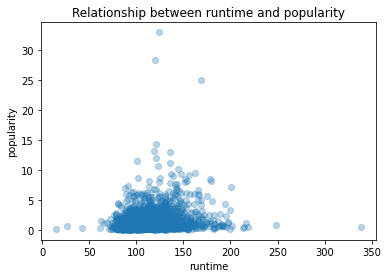

In [36]:
# runtime and popularity correlation
# x-axis
plt.xlabel('runtime')
# y-axis
plt.ylabel('popularity')
# Title of the histogram
plt.title('Relationship between runtime and popularity')
plt.scatter(df['runtime'], df['popularity'], alpha=0.3)
plt.show()

***
#### <center><span style="color:DarkCyan;">The most popular movies usually fall within the *100 - 140 minutes* window</span></center>
***

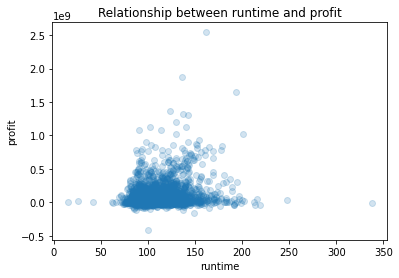

In [37]:
# Profit and runtime correlation
# x-axis
plt.xlabel('runtime')
# y-axis
plt.ylabel('profit')
# Title of the histogram
plt.title('Relationship between runtime and profit')
plt.scatter(df['runtime'], df['profit'], alpha=0.2)
plt.show()

***
#### <center><span style="color:DarkCyan;">Similar to the relationship between run time and popularity, the most profitable movies fall within the *100- 140 minutes* window</span></center>
***

<a id='RQ3'></a>
### Research Question 3  (Which movies had the highest and lowest budget?)

In [38]:
# Movie with the highest budget
df.loc[df['budget'].idxmax()]

popularity                                                  0.25054
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
runtime                                                       100.0
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
vote_count                                                       74
vote_average                                                    6.4
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object

***
#### <center><span style="color:DarkCyan;">Movie with the highest budget: *The Warrior's Way*</span></center>
***

In [39]:
# Movie with the lowest budget
df.loc[df['budget'].idxmin()]

popularity                                                 0.090186
budget                                                            1
revenue                                                         100
original_title                                         Lost & Found
cast              David Spade|Sophie Marceau|Ever Carradine|Step...
director                                               Jeff Pollack
runtime                                                        95.0
genres                                               Comedy|Romance
release_date                                    1999-04-23 00:00:00
vote_count                                                       14
vote_average                                                    4.8
release_year                                                   1999
profit                                                           99
Name: 2618, dtype: object

 ***
#### <center><span style="color:DarkCyan;">Movie with the lowest budget: *Lost & Found*</span></center>
***

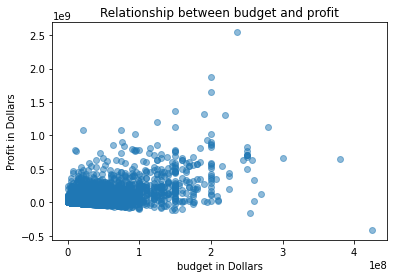

In [40]:
#Budget and profit correlation 
# x-axis
plt.xlabel('budget in Dollars')
# y-axis
plt.ylabel('Profit in Dollars')
# Title of the histogram
plt.title('Relationship between budget and profit')
plt.scatter(df['budget'], df['profit'], alpha=0.5)
plt.show()

***
#### <center><span style="color:DarkCyan;">Interesting to see that high budget movies are *not necessarily* correlating with profit</span></center>
***

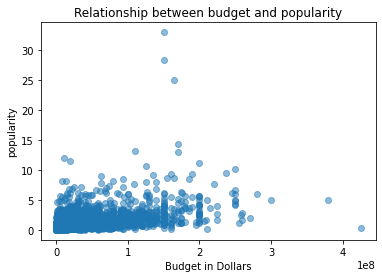

In [41]:
#Budget and popularity correlation 
# x-axis
plt.xlabel('Budget in Dollars')
# y-axis
plt.ylabel('popularity')
# Title of the histogram
plt.title('Relationship between budget and popularity')
plt.scatter(df['budget'], df['popularity'], alpha=0.5)
plt.show()

***
#### <center><span style="color:DarkCyan;">Interesting to see that high budget movies are *not necessarily* correlating with popularity</span></center>
***


<a id='RQ4'></a>
### Research Question 4  (Which movies had the highest and lowest revenue?)


In [42]:
# Movie with the highest revenue 
df.loc[df['revenue'].idxmax()]

popularity                                                 9.432768
budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
runtime                                                       162.0
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
vote_count                                                     8458
vote_average                                                    7.1
release_year                                                   2009
profit                                                   2544505847
Name: 1386, dtype: object

***
#### <center><span style="color:DarkCyan;">Movie with the highest revenue: *Avatar*</span></center>
*** 


In [43]:
# Movie with the lowest revenue 
df.loc[df['revenue'].idxmin()]

popularity                                                 0.462609
budget                                                      6000000
revenue                                                           2
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director                                                  Billy Ray
runtime                                                        94.0
genres                                                Drama|History
release_date                                    2003-11-14 00:00:00
vote_count                                                       46
vote_average                                                    6.4
release_year                                                   2003
profit                                                     -5999998
Name: 5067, dtype: object

***
#### <center><span style="color:DarkCyan;">Movie with the lowest revenue: *Shattered Glass*</span></center>
***

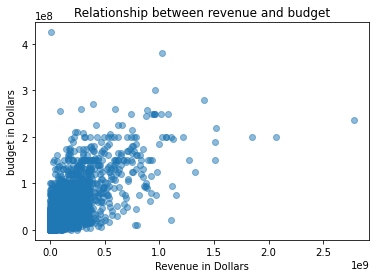

In [44]:
#Revenue and Budget correlation 
# x-axis 
plt.xlabel('Revenue in Dollars')
# y-axis
plt.ylabel('budget in Dollars')
# Title of the histogram
plt.title('Relationship between revenue and budget')
plt.scatter(df['revenue'], df['budget'], alpha=0.5)
plt.show()


***
#### <center><span style="color:DarkCyan;">As shown, the higher the budget of a movie does not necessary mean the higher revenue as the majority fall towards the *50M dollars* revenue</span></center>
***


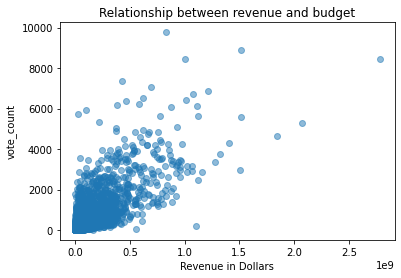

In [45]:
#Revenue and vote_count correlation 
# x-axis 
plt.xlabel('Revenue in Dollars')
# y-axis
plt.ylabel('vote_count')
# Title of the histogram
plt.title('Relationship between revenue and budget')
plt.scatter(df['revenue'], df['vote_count'], alpha=0.5)
plt.show()


***
#### <center><span style="color:DarkCyan;">As shown, we can see that the higher the vote count of a movie the higher the revenue is</span></center>
***


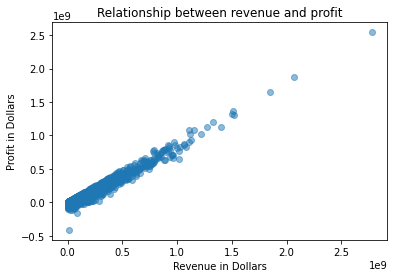

In [46]:
#Revenue and Profit correlation 
# x-axis
plt.xlabel('Revenue in Dollars')
# y-axis
plt.ylabel('Profit in Dollars')
# Title of the histogram
plt.title('Relationship between revenue and profit')
plt.scatter(df['revenue'], df['profit'], alpha=0.5)
plt.show()


***
#### <center><span style="color:DarkCyan;">As shown, a strong correlation between revenue and profit</span></center>
***


<a id='RQ5'></a>
### Research Question 5  (What is the average runtime of all movies?)

In [47]:
# Average runtime of all movies
print("The average run time of all movies is: ",df['runtime'].mean())

The average run time of all movies is:  109.22029060716139


(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   2.,   1.,   1.,   4.,  10.,  21.,  49., 147.,
        183., 254., 290., 308., 392., 261., 271., 204., 280., 178., 163.,
        142., 138., 105.,  73.,  68.,  65.,  52.,  31.,  18.,  19.,  28.,
          9.,  12.,   9.,  14.,   5.,   4.,   6.,   4.,   6.,   4.,   4.,
          4.,   3.,   3.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 15.  ,  18.23,  21.46,  24.69,  27.92,  31.15,  34.38,  37.61,
         40.84,  44.07,  47.3 ,  50.53,  53.76,  56.99,  60.22,  63.45,
         66.68,  69.91,  73.14,  76.37,  79.6 ,  82.83,  86.06,  89.29,
         92.52,  95.75,  98.98, 102.21, 105.44, 108.67, 111.9 , 115.13,
        118.36, 121.59, 124.82

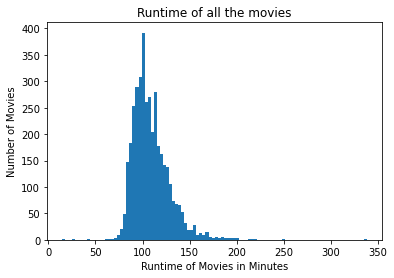

In [49]:
# Diagram for the relationship between runtime and number of movies
# x-axis
plt.xlabel('Runtime of Movies in Minutes')
# y-axis
plt.ylabel('Number of Movies')
# Title of the histogram
plt.title('Runtime of all the movies')
plt.hist(df['runtime'], bins = 100)

***
#### <center><span style="color:DarkCyan;">The highest concentration of movies fall within the *90-120* minutes run time</span></center>
***


***
### <center><span style='background:LightSeaGreen'>Setting up a dataframe for movies with a profit higher than *15M dollars*.</span></center>
***

In [50]:
# Dataframe which has data of the movies that made a profit higher 15M Dollars.
df_profit_data = df[df['profit'] >= 15000000]
# Indexing the dataframe
df_profit_data.index = range(len(df_profit_data))
df_profit_data.head()
df_profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      2091 non-null   float64       
 1   budget          2091 non-null   int64         
 2   revenue         2091 non-null   int64         
 3   original_title  2091 non-null   object        
 4   cast            2090 non-null   object        
 5   director        2091 non-null   object        
 6   runtime         2091 non-null   float64       
 7   genres          2091 non-null   object        
 8   release_date    2091 non-null   datetime64[ns]
 9   vote_count      2091 non-null   int64         
 10  vote_average    2091 non-null   float64       
 11  release_year    2091 non-null   int64         
 12  profit          2091 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 212.5+ KB


<a id='RQ6'></a>
### Research Question 6  (Which are the most successful genres(over 15M dollars)?)


In [51]:
# Using | to concat the data then split it again using | aslo we we can count the number of times it was split to give us the output
genres_count = pd.Series(df_profit_data['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Drama              829
Comedy             756
Action             640
Thriller           637
Adventure          496
Romance            342
Crime              335
Family             296
Science Fiction    289
Fantasy            246
Horror             237
Mystery            174
Animation          147
Music               73
History             70
War                 69
Western             23
Documentary         11
Foreign              1
TV Movie             1
dtype: int64

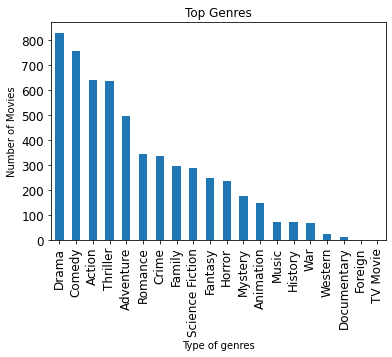

In [52]:
# Diagram for the relationship between geners and number of movies
diagram = genres_count.plot.bar(fontsize = 12)
# Set a title
diagram.set(title = 'Top Genres')
# x-axis
diagram.set_xlabel('Type of genres')
# y-axis
diagram.set_ylabel('Number of Movies')
plt.show()


***
#### <center><span style="color:DarkCyan;">As shown, the most successful genre overall is *Drama*</span></center>
***


<a id='RQ7'></a>
### Research Question 7  (Which are the most frequent cast involved in high profit movies(over 15M dollars)?)


In [53]:
# Using | to concat the data then split it again using | aslo we we can count the number of times it was split to give us the output 
cast_count = pd.Series(df_profit_data['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count.head(15)

Tom Cruise            30
Tom Hanks             30
Brad Pitt             29
Robert De Niro        28
Bruce Willis          28
Samuel L. Jackson     26
Johnny Depp           24
Cameron Diaz          24
Robin Williams        23
Eddie Murphy          23
Denzel Washington     23
Harrison Ford         23
Sylvester Stallone    23
Mark Wahlberg         22
Matt Damon            22
dtype: int64

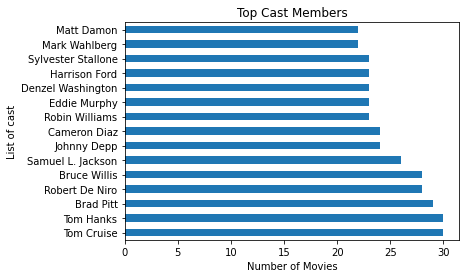

In [54]:
# Diagram for the relationship between cast memeber and number of movies
diagram =cast_count.head(15).plot.barh(fontsize = 10)
# Set a title
diagram.set(title = 'Top Cast Members')
# x-axis
diagram.set_xlabel('Number of Movies')
# y-axis
diagram.set_ylabel('List of cast')
plt.show()

<a id='RQ8'></a>
### Research Question 8  (Which are the most frequent directors involved in high profit movies(over 15M dollars)?)


In [55]:
# Using | to concat the data then split it again using | aslo we we can count the number of times it was split to give us the output 
director_count = pd.Series(df_profit_data['director'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
director_count.head(15)

Steven Spielberg    26
Clint Eastwood      19
Tim Burton          16
Robert Zemeckis     14
Ridley Scott        14
Ron Howard          12
Michael Bay         11
Joel Schumacher     11
Woody Allen         11
Tony Scott          11
David Fincher       10
Peter Farrelly      10
Martin Scorsese     10
Joel Coen            9
Robert Rodriguez     9
dtype: int64

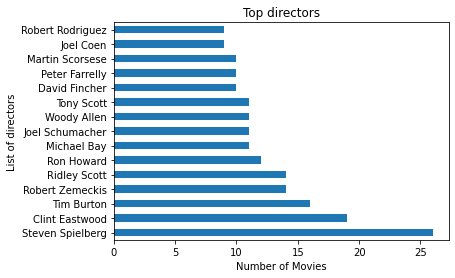

In [56]:
# Diagram for the relationship between cast memeber and number of movies
diagram =director_count.head(15).plot.barh(fontsize = 10)
# Set a title
diagram.set(title = 'Top directors')
# x-axis
diagram.set_xlabel('Number of Movies')
# y-axis
diagram.set_ylabel('List of directors')
plt.show()

<a id='RQ9'></a>
### Research Question 9  (What is the average budget, revenue and runtime of movies with over 15M Dollars profit?)


In [57]:
# the average budget of movies which made a profit higher than 15M Dollars
print("Average budgest is:", df_profit_data['budget'].mean(), "$")

Average budgest is: 48097547.47058824 $


In [58]:
# the average budget of movies which made a profit higher than 15M Dollars
print("Average revenue is:", df_profit_data['revenue'].mean(), "$")

Average revenue is: 183237059.1262554 $


In [59]:
# the average runtime of movies which made a profit higher than 15M Dollars
df_profit_data['runtime'].mean()
print("Average runtime is:", df_profit_data['runtime'].mean(), "mins")

Average runtime is: 111.83835485413678 mins


***
### <center><span style='background:LightSeaGreen'>Setting up relationship diagrams between further attributes to assist in providing insights.</span></center>
***

 ***
 - #### <span style="color:DarkSlateBlue;">Popularity and vote_average correlation</span>
***

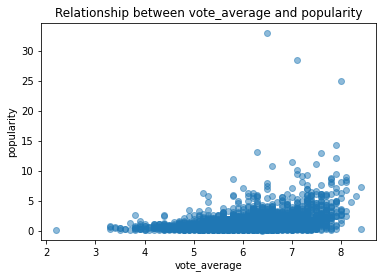

In [60]:
# x-axis
plt.xlabel('vote_average')
# y-axis
plt.ylabel('popularity')
# Title of the histogram
plt.title('Relationship between vote_average and popularity')
plt.scatter(df['vote_average'], df['popularity'], alpha=0.5)
plt.show()

***
#### <center><span style="color:DarkCyan;">A slight correlation exists between the higher vote average and higher popularity </span></center>
***


 ***
 - #### <span style="color:DarkSlateBlue;">Relationship between vote_average and vote_count</span>
***

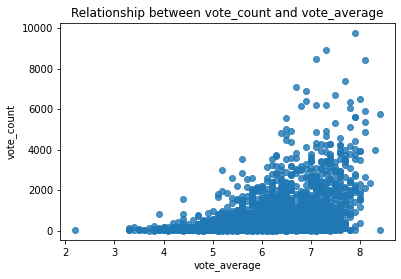

In [61]:
# x-axis
plt.xlabel('vote_average')
# y-axis
plt.ylabel('vote_count')
# Title of the histogram
plt.title('Relationship between vote_count and vote_average')
plt.scatter(df['vote_average'], df['vote_count'], alpha=0.8)
plt.show()

***
#### <center><span style="color:DarkCyan;">A strong correlation exists between the higher vote count and higher vote average</span></center>
***


 ***
 - #### <span style="color:DarkSlateBlue;">Number of movie releases over the years</span>
***

(array([  5.,  10.,   0.,   7.,   0.,   6.,   0.,   7.,   0.,   5.,   5.,
          0.,  13.,   0.,   9.,   0.,   4.,   0.,  11.,   0.,  13.,   8.,
          0.,  12.,   0.,  13.,   0.,   9.,   0.,  15.,  19.,   0.,  17.,
          0.,  16.,   0.,  23.,   0.,  30.,   0.,  26.,  31.,   0.,  42.,
          0.,  41.,   0.,  48.,   0.,  46.,  57.,   0.,  51.,   0.,  53.,
          0.,  50.,   0.,  53.,   0.,  72.,  62.,   0.,  81.,   0.,  86.,
          0.,  90.,   0.,  92., 116.,   0., 106.,   0., 121.,   0., 127.,
          0., 121.,   0., 147., 163.,   0., 169.,   0., 165.,   0., 167.,
          0., 174., 178.,   0., 199.,   0., 158.,   0., 180.,   0., 165.,
        160.]),
 array([1960.  , 1960.55, 1961.1 , 1961.65, 1962.2 , 1962.75, 1963.3 ,
        1963.85, 1964.4 , 1964.95, 1965.5 , 1966.05, 1966.6 , 1967.15,
        1967.7 , 1968.25, 1968.8 , 1969.35, 1969.9 , 1970.45, 1971.  ,
        1971.55, 1972.1 , 1972.65, 1973.2 , 1973.75, 1974.3 , 1974.85,
        1975.4 , 1975.95, 1976.5 ,

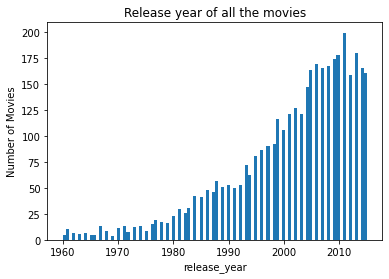

In [62]:
# Diagram for the relationship between runtime and number of movies
# x-axis
plt.xlabel('release_year')
# y-axis
plt.ylabel('Number of Movies')
# Title of the histogram
plt.title('Release year of all the movies')
plt.hist(df['release_year'], bins = 100)

***
#### <center><span style="color:DarkCyan;">We can see that the number of movies releases increases drastically over the years while the highest spike is seen between 2009 & 2012</span></center>
***

<a id='conclusions'></a>
# <center>Conclusions</center>
***

>### Highlights

***
  ✔***Movie with the highest profit: Avatar***

  ✔***Movie with the lowest profit: The Warrior's Way***

 
>	<li>As we can expect, the more popular a movie is the more profit it makes.</li>
 <li>Vote counts have a slight impact on movies profit but not strong enough to be considered a causality or an indicative KPI</li>

***
✔***Movie with the most runtime: Carlos***

✔***Movie with the least runtime: Kid's Story***

>	<li>The most popular movies fall within the 100 - 140 minutes duration leading to the most profitable movies to be within the same duration.</li>
 <li>Most movies in general fall within the 90-120 minutes run time duration</li>
***

✔***Movie with the highest budget: The Warrior's Way***

✔***Movie with the lowest budget: Lost & Found***

✔***Movie with the highest revenue: Avatar***

✔***Movie with the lowest revenue: Shattered Glass***


>	<li>We would expect that spending high budgets on movies would lead to high popularity and/or revenue which would lead to a high profit (given the above established relationships), however it seems that high budgets does not necessarily correlate with popularity, revenue or profit.</li>
 <li>Vote count is an impacting factor on the revenue of a movie, as the vote count goes higher the more the revenue a movie makes and as established there is a direct (Semi-linear) relationship between profit and revenue, therefor vote count has a direct impact on profit.</li> 
***


***Vote impact:***

>	<li>The higher the vote count is, the higher the vote average, increasing the movie’s popularity, causing a higher revenue and eventually leading to a higher profit gains.</li> 

***
>	<li>The number of movie releases rapidly increases over the years and spiking between 2009 and 2012.</li> 



***
>**Over 15M Dollars movies:**
***
 - *The top five most successful movie genres in order are:* 

| # | Genre | Number of Movies |
| :---: | :---:  | :---: |
| 1 |Drama| 829 |
| 2 | Comedy| 756 |
| 3 |Action| 640 |
| 4 |Thriller| 637 |
| 5 | Adventure| 496 |
         
          
***

- *The top 3 worst performing movie genres are:* 

| # | Genre | Number of Movies |
| :---:| :---:  | :---: |
| 1 |Foreign| 1 |
| 2 | TV Movie  | 1 |
| 3 |Documentary| 11 |


***
- *The top five most successful cast in order are:* 

| # | Cast | Number of Movies |
| :---: | :---:  | :---: |
| 1 |Tom Hanks| 30 |
| 2 | Tom Cruise| 30 |
| 3 |Brad Pitt | 29 |
| 4 |Robert De Niro| 28 |
| 5 | Bruce Willis| 28 |


***
- *The top five most successful directors in order are:* 

| # | Director | Number of Movies |
| :---: | :---:  | :---: |
| 1 |Steven Spielberg| 26 |
| 2 | Clint Eastwood| 19 |
| 3 |Tim Burton    | 16 |
| 4 |Robert Zemeckis| 14 |
| 5 | Ridley Scott | 14 |


***
>	<li>Average budget is: 48097550 Dollars</li>
 <li>Average revenue is: 183237060 Dollars</li>
 <li>Average runtime is: 112 mins</li>


>### Conclusion 


- While the following can’t be applied as a general rule due the certain limitations to be mentioned later on, however it seems that the most successful formula for movies, given the data available, is:

  An average budget of around ***48 million dollars*** **+** an average runtime of around ***112 minutes*** **+** a selection of one or more of the following genres in order: ***Drama, Comedy, Action, Thriller, Adventure*** **+** at least one of the following cast members in order:  ***Tom Hanks, Tom Cruise, Brad Pitt, Robert De Niro, Bruce Willis*** and **+** finally a selection of one of the following directors in order: ***Steven Spielberg, Clint Eastwood, Tim Burton, Robert Zemeckis, Ridley Scott.***
  
  
<center><span style='background:LightSeaGreen'>✔That been said, these should be considered an indication of the likelihood of a movie being successful in popularity and revenue/profit yields rather than a go to formula.</span></center>


>### Limitations



***Limitations and Assumptions are:***

✔Some data were removed due to certain factors such as outliers, missing data, etc. and no advanced analytics were performed such as regression to measure similar properties instead of mean, therefor the analysis/stats is not of an absolute accuracy and could have impacted the insights/conclusions. 

✔Quality of production (production company/producers choices), time of the year/release date (seasons, holidays: December/Christmas, New-year, etc) marketing campaign, and possible other factor can greatly impact the success/failure of a movie or the margin of profit. 

✔In the analysis, the determining factor of a movie success was set by profit, however a movie could be highly successful in quality/critics/awards categories but not yield a high profit  

✔The benchmark for the most successful movies was set to be 15M Dollars, there are no specific basis on which this figure was selected as there are no general rules for such criteria in general, my choice was based on the fact that 15M Dollars budgeted movie is consider a small budget and to ensure a large view of the data analytics is shown and in perspective 


✔Reference to the above point, a strong correlation exists between revenue and profit, however the higher the budget does not mean the higher the profit, yet it can be a critics/awards favorite. 




## Submitting your Project 

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1